In [12]:
import tensorflow as tf
import numpy as np
from keras_facenet import FaceNet
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from utils.face_mtcnn import *

In [13]:
embedder = FaceNet()

In [33]:
base_dir = "data/train_images"
persons = os.listdir(base_dir)
images = {}
# image_paths = []
for person in persons:
    images[person] = []
    paths = os.listdir(os.path.join(base_dir,person))[:5]
    for path in paths:
        # image_paths.append(os.path.join(base_dir,person,path))
        images[person].append(cv2.cvtColor(cv2.imread((os.path.join(base_dir,person,path))),cv2.COLOR_BGR2RGB))
print("Total number of people found = ", len(images))


Total number of people found =  2


(-0.5, 639.5, 639.5, -0.5)

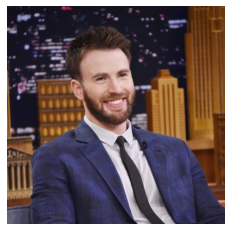

In [110]:
#sample image
plt.imshow(images['Chris'][2] , cmap = "gray")
plt.axis("off")

In [35]:
def Face_detection(images):
    ''' it will detect the face in a image 
        and will return a list of cropped images containing only face.
        
        input: list of image path on working directory
    
    '''
    
    crop_img = {}
    
    # faceCascade= cv2.CascadeClassifier("utils/haarcascade_frontalface_default.xml")
    for a in images.keys():
        crop_img[a] = []
        for img in images[a]:
            faces = detect_Faces_img(img)
            if len(faces) != 0:
                for b in faces:
                    (x,y,w,h) = b['box']
                    Cropped = img[y : y + h , x: x+w ]
                    crop_img[a].append(Cropped)  
        
    return crop_img

In [36]:
# cropped images
Crop_Images = Face_detection(images)

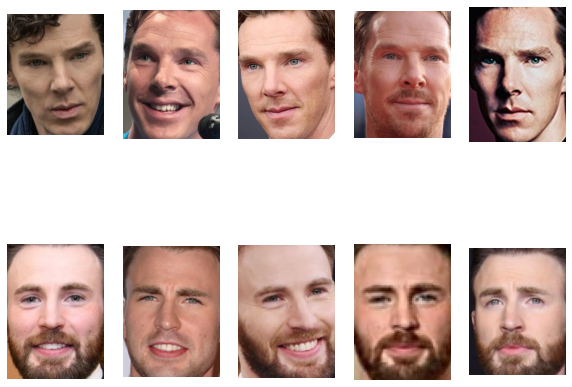

In [53]:
#plotting various faces found in our dataset!

fig , ax = plt.subplots(len(Crop_Images), 5 , figsize = (10,8))
i=1
for a in Crop_Images.keys():
    for j in range(5):
        plt.subplot(2,5,i)
        plt.axis("off")
        plt.imshow(Crop_Images[a][j])
        i += 1


In [55]:
embeddings = {}
for a in Crop_Images.keys():
    embeddings[a] = embedder.embeddings(Crop_Images[a])

In [56]:
#creating a database for people we expect to visit us.
database_size = 5
database = {}
for person in persons:
    database[str(person)] = embeddings[person][:database_size]
        
database

{'Ben': array([[-0.01795235, -0.02363339, -0.00272109, ..., -0.00244025,
         -0.02164875, -0.03304688],
        [ 0.00653493, -0.03710208,  0.0345618 , ...,  0.00255678,
         -0.07484119, -0.07949924],
        [ 0.02244694, -0.0632055 ,  0.01371152, ..., -0.01638585,
         -0.01576117, -0.08940025],
        [ 0.01774295, -0.0409545 ,  0.00835492, ...,  0.02975539,
         -0.03518092, -0.08887043],
        [ 0.02795202, -0.06151393,  0.02411076, ..., -0.00292438,
         -0.01059645, -0.09036852]], dtype=float32),
 'Chris': array([[-0.00556478,  0.00074929, -0.00499367, ..., -0.00654495,
         -0.00625114, -0.02765532],
        [ 0.00478884,  0.0552065 ,  0.0302975 , ...,  0.04145799,
          0.066743  , -0.03033401],
        [ 0.00169897, -0.01162907,  0.03835967, ...,  0.00347301,
         -0.00251314, -0.02639209],
        [ 0.01206494,  0.04434022,  0.02690631, ..., -0.01269804,
          0.00889455, -0.03764299],
        [-0.00637959,  0.01248587, -0.01231052, .

In [62]:
database['Ben'].shape

(5, 512)

In [101]:
def Face_recog(image_path , alpha = 2):
    '''
    image_path : list of individual input image path.
    alpha : it is a hyperparameter
    '''
    
    #detecting face
    img = cv2.cvtColor(cv2.imread(image_path),cv2.COLOR_BGR2RGB)
    faces = detect_Faces_img(img)
    crop_imgs = []
    if len(faces) != 0:
        for b in faces:
            (x,y,w,h) = b['box']
            Cropped = img[y : y + h , x: x+w ]
            crop_imgs.append(Cropped)  

    plt.axis("off")
    plt.imshow(crop_imgs[0])
    plt.show()
 

    
    img_embedding = embedder.embeddings(crop_imgs)
    
    #calculate dist wrt to database images
    min_dist = 100
    for (name,db_emb) in database.items():
        
        for emb in db_emb:
        
            dist = np.linalg.norm(img_embedding - db_emb)
            
            if dist < min_dist:
                min_dist = dist
                identity = name
            
    if min_dist > alpha:
        print("Not found in Database")
        
    else:
        print(f"{identity} identified")
    
    

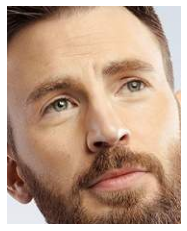

Chris identified


In [108]:
test_img_path = 'data/test/00000042.jpeg'
Face_recog(test_img_path)

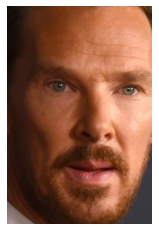

Ben identified


In [104]:
test_img_path = 'data/test/00000082.jpeg'
Face_recog(test_img_path)

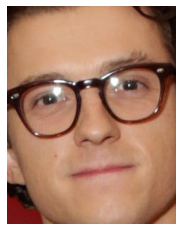

Not found in Database


In [105]:
test_img_path = 'data/test/00000069.jpeg'
Face_recog(test_img_path)

In [ ]:
### Doesnt work with multiple ppl in frame
### Add attendancd kind of system and set up output